This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).

Problem Statement: To classify Mushroom as edible or poisonous.

Exploratory data analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("C:/Users/gadre/Downloads/mushrooms.csv")

In [3]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [4]:

data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8100,8111,8080,8084,...,8092,8081,8114,8093,8104,8097,8076,8102,8104,8088
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7890,6800,5583,1728,...,4915,4421,4374,8093,7904,7461,3925,2388,4037,3146


In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
data.shape

(8124, 23)

In [7]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment               24
gill-spacing                  13
gill-size                     44
gill-color                    40
stalk-shape                   17
stalk-root                  2499
stalk-surface-above-ring      38
stalk-surface-below-ring      32
stalk-color-above-ring        43
stalk-color-below-ring        10
veil-type                     31
veil-color                    20
ring-number                   27
ring-type                     48
spore-print-color             22
population                    20
habitat                       36
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8100 non-null object
gill-spacing                8111 non-null object
gill-size                   8080 non-null object
gill-color                  8084 non-null object
stalk-shape                 8107 non-null object
stalk-surface-above-ring    8086 non-null object
stalk-surface-below-ring    8092 non-null object
stalk-color-above-ring      8081 non-null object
stalk-color-below-ring      8114 non-null object
veil-type                   8093 non-null object
veil-color                  8104 non-null object
ring-number                 8097 non-null object
ring-type  

Checking if data is Unbalanced, unbalanced dataset is when one class is much more present than the other. 
Ideally, in the context of classification, we want an equal number of instances of each class.
In our case, we want to see if there is an equal number of poisonous and edible mushrooms in the data set.
We can plot the frequency of each class like the following:

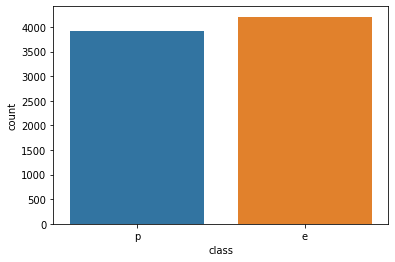

In [11]:
x= data['class']
ax=sns.countplot(x=x, data=data)

It shows that data is fairly balanced data set with an almost equal number of poisonous and edible mushrooms.

The following Bar plot of all possible values separated by the class of mushroom, it displayes how each feature affects the target

In [12]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax=sns.countplot(x=data[col],hue=hue,data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


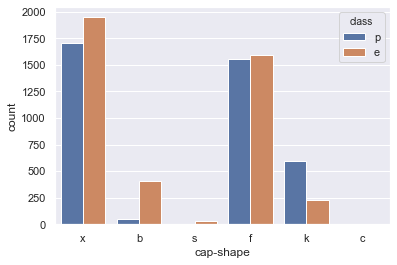

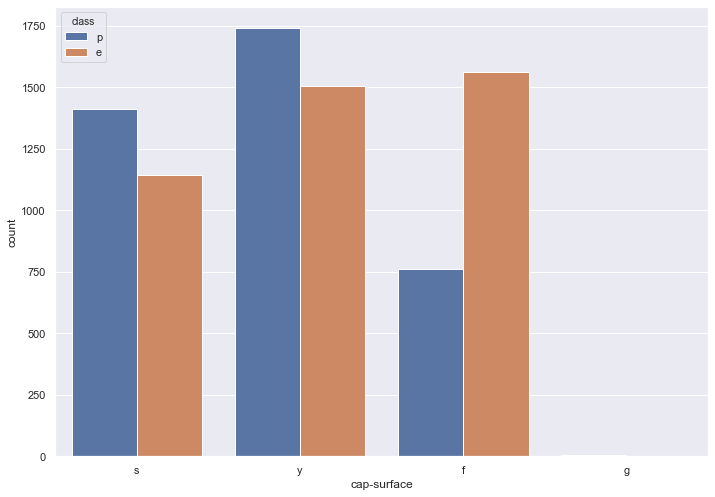

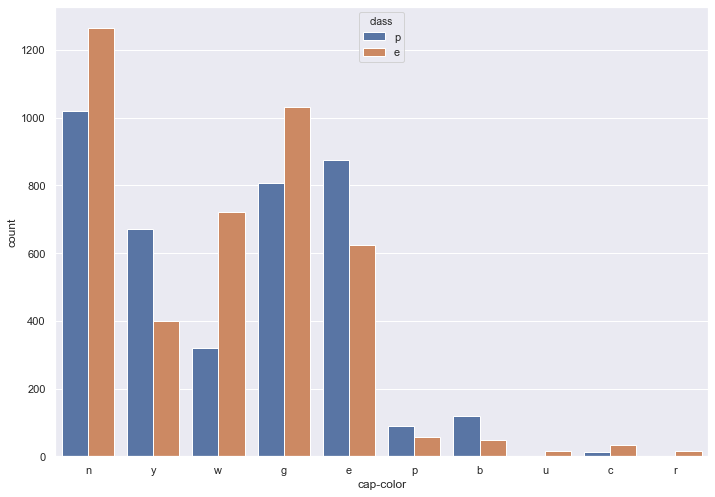

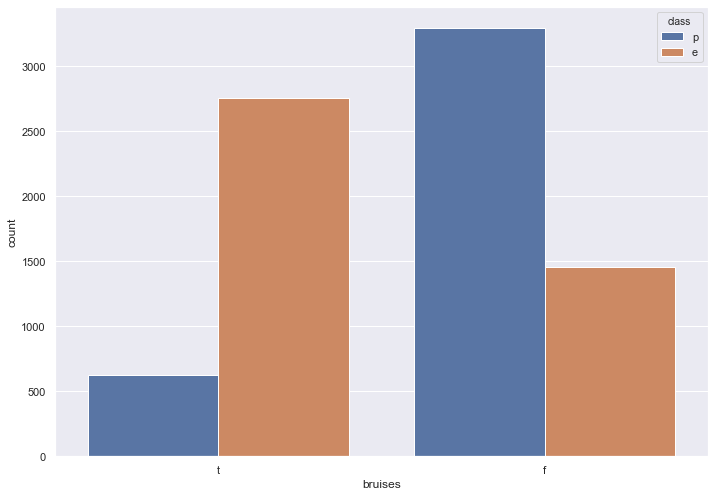

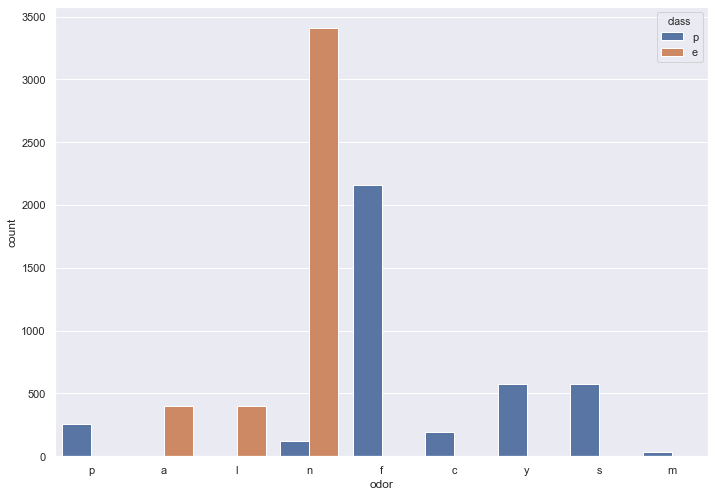

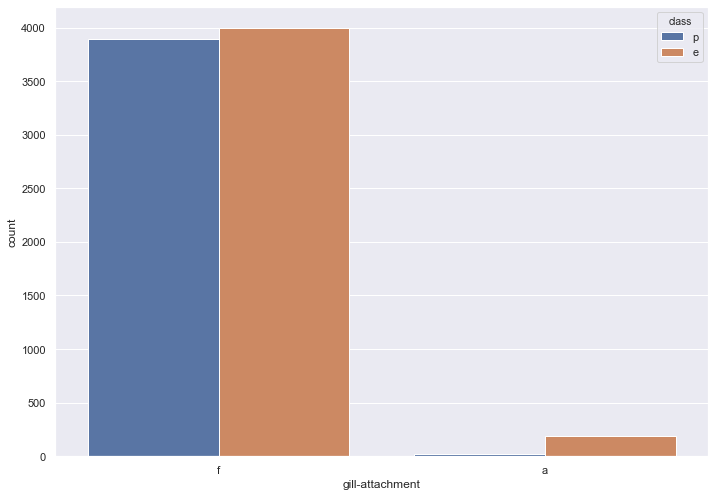

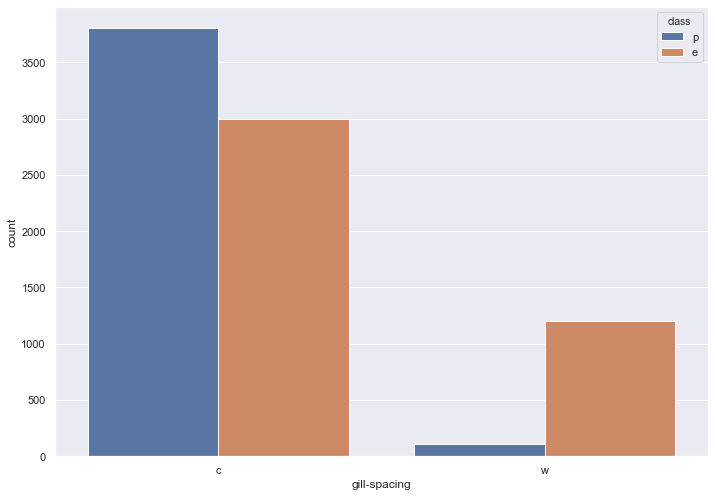

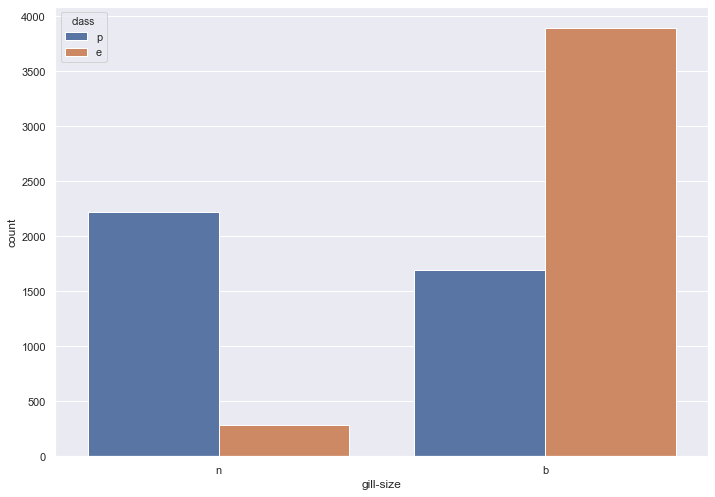

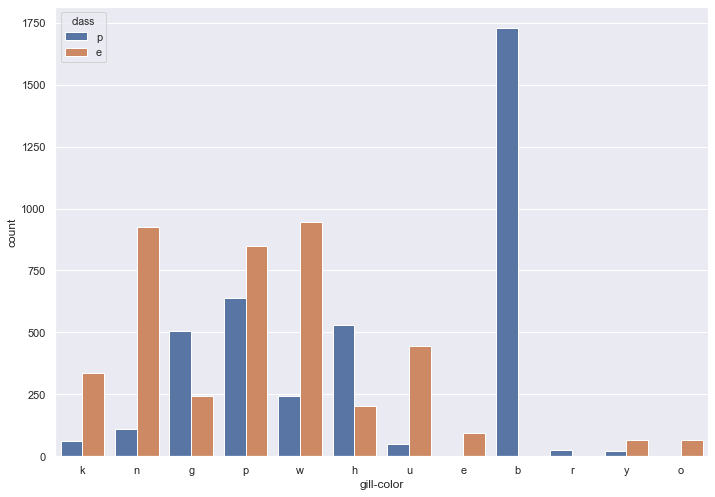

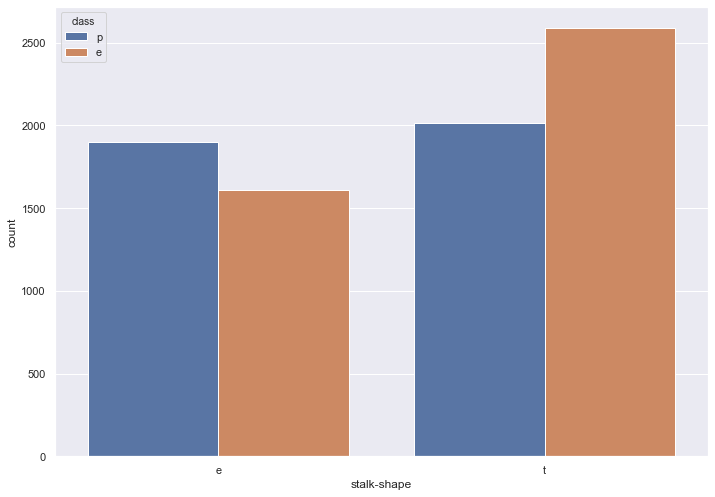

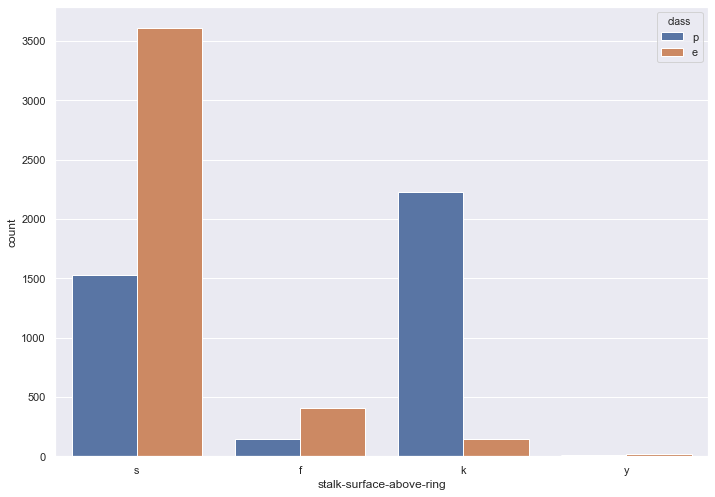

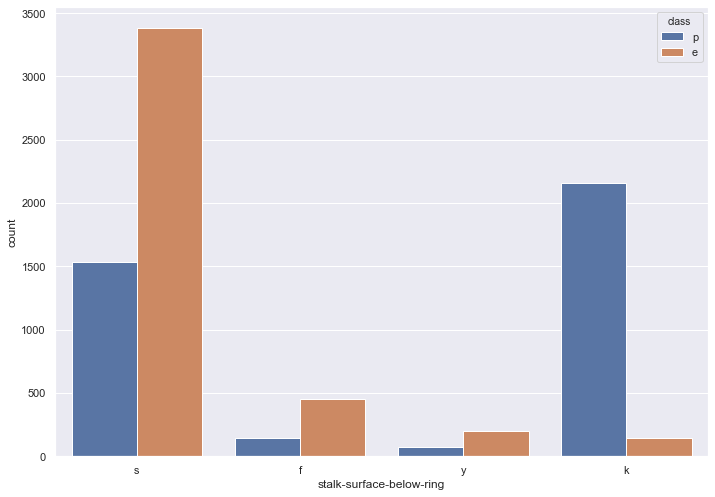

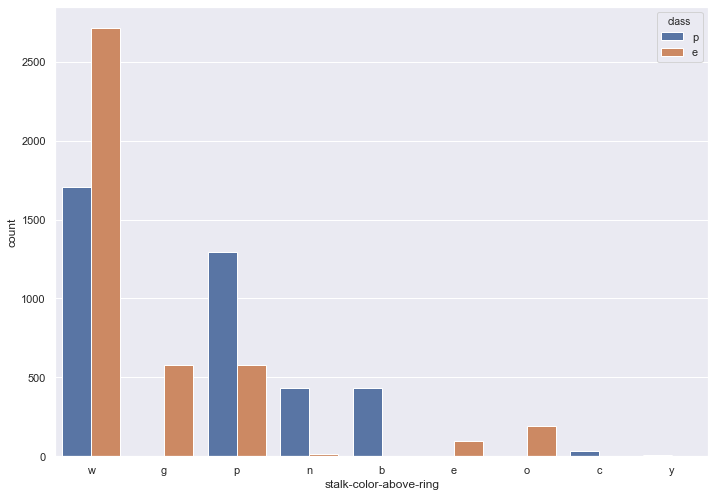

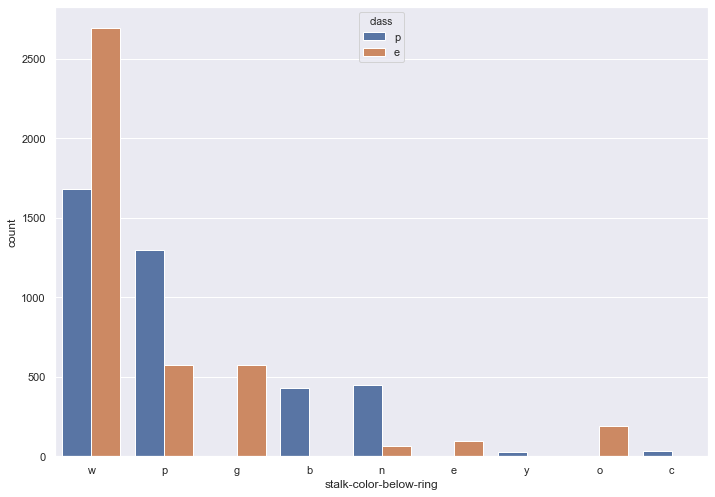

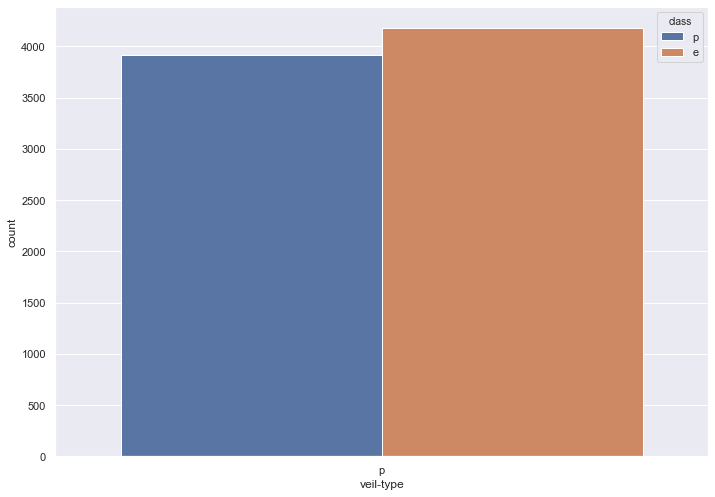

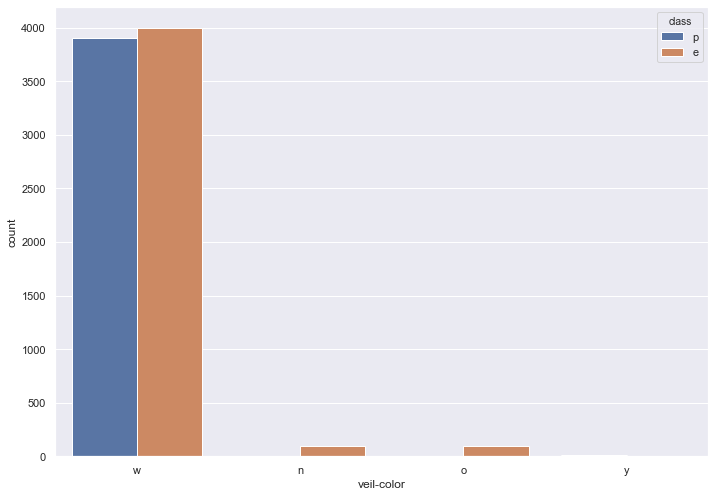

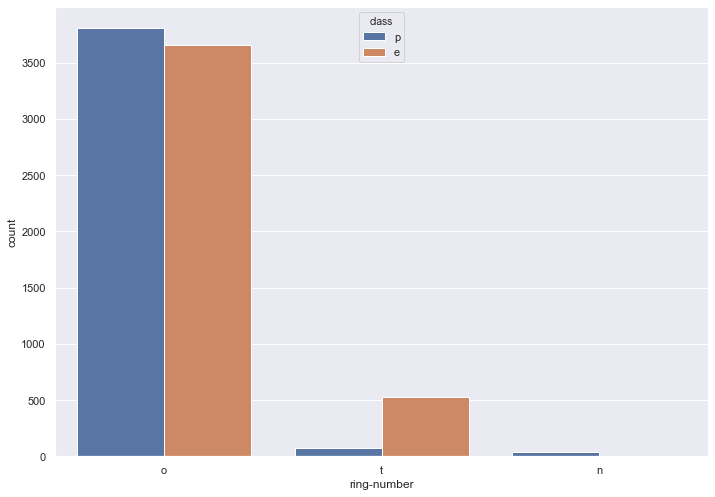

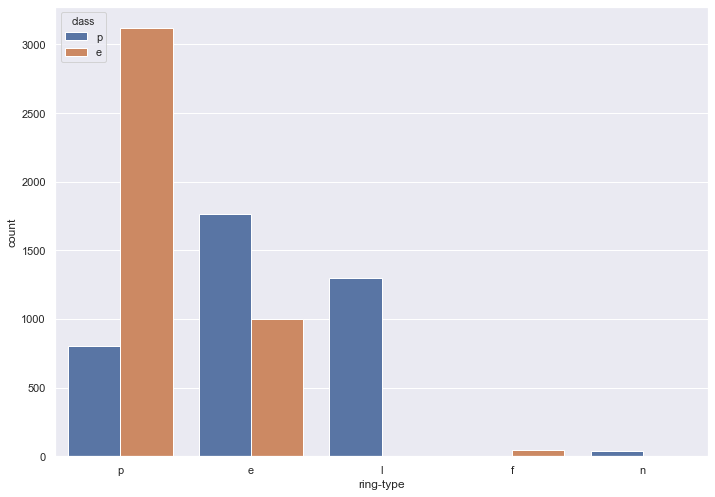

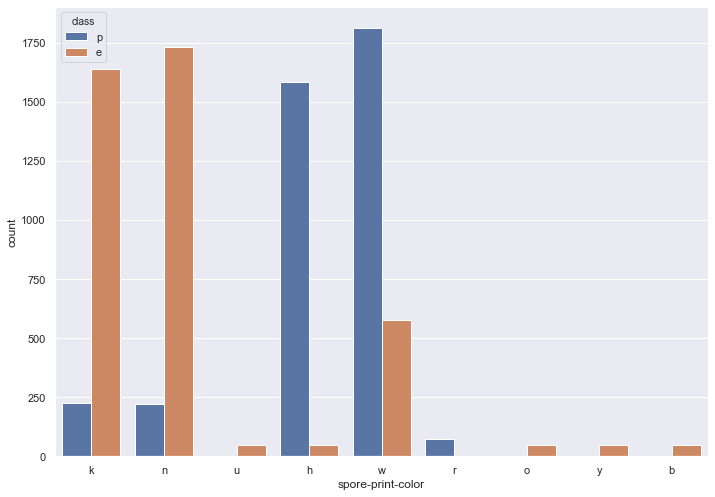

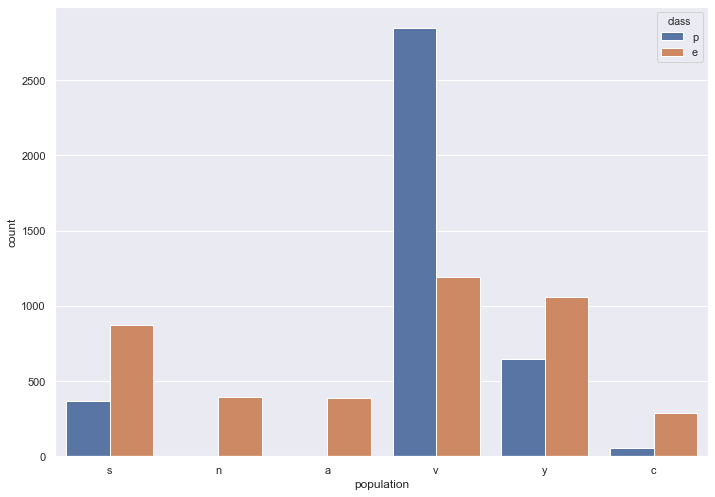

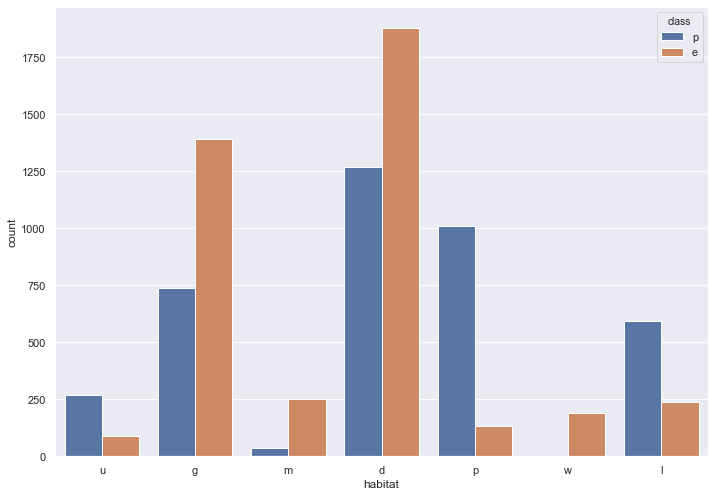

In [13]:
hue=data['class']
data_for_plot=data.drop('class',1)
plot_data(hue,data_for_plot)

In [15]:
data.isnull().sum()

class                        0
cap-shape                    0
cap-surface                  0
cap-color                    0
bruises                      0
odor                         0
gill-attachment             24
gill-spacing                13
gill-size                   44
gill-color                  40
stalk-shape                 17
stalk-surface-above-ring    38
stalk-surface-below-ring    32
stalk-color-above-ring      43
stalk-color-below-ring      10
veil-type                   31
veil-color                  20
ring-number                 27
ring-type                   48
spore-print-color           22
population                  20
habitat                     36
dtype: int64

dropping Stalk root since it has 2499 missing values and replacing other missing values with mode

In [ ]:
data = data.drop("stalk-root", axis=1)

In [16]:
data_mode=data.mode()
#simply using a forloop with object 
for x in data.columns.values:
    data[x]=data[x].fillna(value=data_mode[x].iloc[0])
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

converting the categorical variables to dummy variables and drooping the first variable to not fall into dummy Variable Trap

In [17]:
data1=pd.get_dummies(data,drop_first=True )
data1.head(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


Creating a Train Test Split for Data Modelling

In [19]:
x= data1.iloc[:,[1,2,4,5,6,7,11,16,17,19,21,22]].values
y= data1.iloc[:,0].values
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.25, random_state=0)

In [22]:
print ('X_train shape is : ', X_train.shape)
print('X_test shape is : ', X_test.shape)
print('Y_train shape is : ', Y_train.shape)
print('Y_test shape is : ', Y_test.shape)

X_train shape is :  (6093, 12)
X_test shape is :  (2031, 12)
Y_train shape is :  (6093,)
Y_test shape is :  (2031,)


Scaling the dataset using Min Max Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Modelling
# 1. Logistic Regression

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=clf,X=X_train_scaled, y=Y_train, cv=10)
print(accuracies.mean())

clf = LogisticRegression()
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid, cv = 2, scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

0.665679280876017


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Best parameters{'C': 1}
Best score 0.68


In [37]:
clf = LogisticRegression(C=1).fit(X_train_scaled,Y_train)
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf.score(X_train_scaled,Y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf.score(X_test_scaled,Y_test)))


Accuracy of Logistic Regression Classifier on training set: 0.67
Accuracy of Logistic Regression Classifier on test set: 0.67


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 2. K Nearest Neighbour

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

accuracies=cross_val_score(estimator=knn,X=X_train_scaled, y=Y_train, cv=10)
print(accuracies.mean())

knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25, 30]}

grid_search = GridSearchCV(knn, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

0.6513539032360438
Best parameters{'n_neighbors': 5}
Best score 0.71


In [39]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, Y_test)))

Accuracy of K-NN classifier on training set: 0.65
Accuracy of K-NN classifier on test set: 0.67


# 3. SVC Linear

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=svclinear,X=X_train_scaled, y=Y_train, cv=10)
print(accuracies.mean())

svclinear = SVC(kernel = 'linear')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svclinear, param_grid, cv = 2)
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

0.6558378271498417
Best parameters{'C': 10, 'gamma': 0.001}
Best score 0.67


In [50]:
svclinear = SVC(kernel = 'linear',C=0.5,gamma=0.001)
svclinear.fit(X_train_scaled, Y_train)

print(svclinear.score(X_train_scaled, Y_train))
print(svclinear.score(X_test_scaled, Y_test))

0.6541933366157886
0.6528803545051699


# 4. SVC Kernel

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=svckernal,X=X_train_scaled, y=Y_train, cv=10)
print(accuracies.mean())

svckernal = SVC(kernel = 'rbf')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svckernal, param_grid, cv = 2)
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

0.7114757507462834
Best parameters{'C': 1, 'gamma': 1}
Best score 0.72


In [53]:
svckernal = SVC(kernel = 'rbf',C=5,gamma=0.05)
svckernal.fit(X_train_scaled, Y_train)

print(svckernal.score(X_train_scaled, Y_train))
print(svckernal.score(X_test_scaled, Y_test))

0.7140981454127687
0.7272279665189562


# 5. Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=DTC,X=X_train_scaled, y=Y_train, cv=10)
print(accuracies.mean())

DTC = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,11)}

grid_search = GridSearchCV(DTC, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)   

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

0.7214838369595554
Best parameters{'max_depth': 10}
Best score 0.72


In [57]:
DTC = DecisionTreeClassifier(max_depth=6)
DTC.fit(X_train_scaled,Y_train)

print(DTC.score(X_train_scaled, Y_train))
print(DTC.score(X_test_scaled, Y_test))

0.6886591170195306
0.6991629739044806


# 6. Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=RFC,X=X_train_scaled, y=Y_train, cv=10)
print(accuracies.mean())

RFC = RandomForestClassifier()

param_grid = {'max_depth': range(1,11),'n_estimators' : [10,50,100,150,200]}

grid_search = GridSearchCV(RFC, param_grid, cv = 2 ,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)   

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

0.7200084271234899
Best parameters{'max_depth': 7, 'n_estimators': 50}
Best score 0.72


In [59]:
RFC = RandomForestClassifier(max_depth=10,n_estimators= 150)
RFC.fit(X_train_scaled,Y_train)

print(RFC.score(X_train_scaled, Y_train))
print(RFC.score(X_test_scaled, Y_test))

0.7218119153126539
0.7360905957656327


## Conclusion

Random Forest gives the best Modelling Score.
Decision Trees and Random forest has highest Cross Validation Score. While performing grid search in decision tree the train test score was less which futhur improved while performing Random Forest.
The table below shows the values for all the Models:

                        Cross Validation	Grid search score	train	test
				
Logistic Regression	        0.665	            0.68             0.67   0.67
				
KNN	                        0.651              	0.71	         0.65	0.67
				
SVC Linear              	0.655	            0.67	         0.65	0.65
				
SVC kernel	                 0.71	            0.72	         0.71	0.72
				
Decision Tree	             0.72	            0.72	         0.68	0.69
				
Random Forest	             0.72	            0.72	         0.72	0.73

# Classification

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981).

Problem Statement: To classify Mushroom as edible or poisonous.
Link to Data Set: https://www.kaggle.com/uciml/mushroom-classification

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("C:/Users/gadre/Downloads/mushrooms.csv")

In [2]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [3]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8100,8111,8080,8084,...,8092,8081,8114,8093,8104,8097,8076,8102,8104,8088
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7890,6800,5583,1728,...,4915,4421,4374,8093,7904,7461,3925,2388,4037,3146


In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.shape

(8124, 23)

In [6]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment               24
gill-spacing                  13
gill-size                     44
gill-color                    40
stalk-shape                   17
stalk-root                  2499
stalk-surface-above-ring      38
stalk-surface-below-ring      32
stalk-color-above-ring        43
stalk-color-below-ring        10
veil-type                     31
veil-color                    20
ring-number                   27
ring-type                     48
spore-print-color             22
population                    20
habitat                       36
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8100 non-null object
gill-spacing                8111 non-null object
gill-size                   8080 non-null object
gill-color                  8084 non-null object
stalk-shape                 8107 non-null object
stalk-root                  5625 non-null object
stalk-surface-above-ring    8086 non-null object
stalk-surface-below-ring    8092 non-null object
stalk-color-above-ring      8081 non-null object
stalk-color-below-ring      8114 non-null object
veil-type                   8093 non-null object
veil-color                  8104 non-null object
ring-number

Checking if data is Unbalanced, unbalanced dataset is when one class is much more present than the other. Ideally, in the context of classification, we want an equal number of instances of each class. In our case, we want to see if there is an equal number of poisonous and edible mushrooms in the data set. We can plot the frequency of each class like the following:

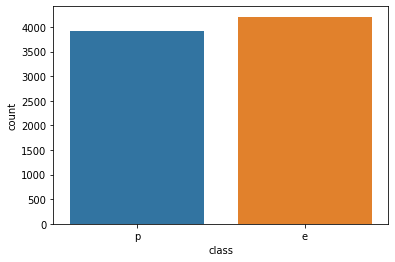

In [8]:
x= data['class']
ax=sns.countplot(x=x, data=data)

It shows that data is fairly balanced data set with an almost equal number of poisonous and edible mushrooms.

The following Bar plot of all possible values separated by the class of mushroom, it displayes how each feature affects the target

In [9]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(11.7,8.27)})
        ax=sns.countplot(x=data[col],hue=hue,data=data)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


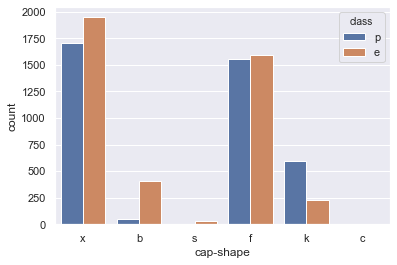

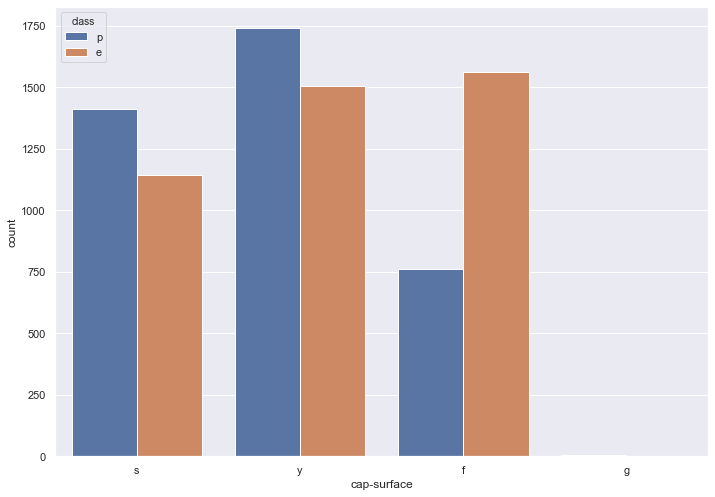

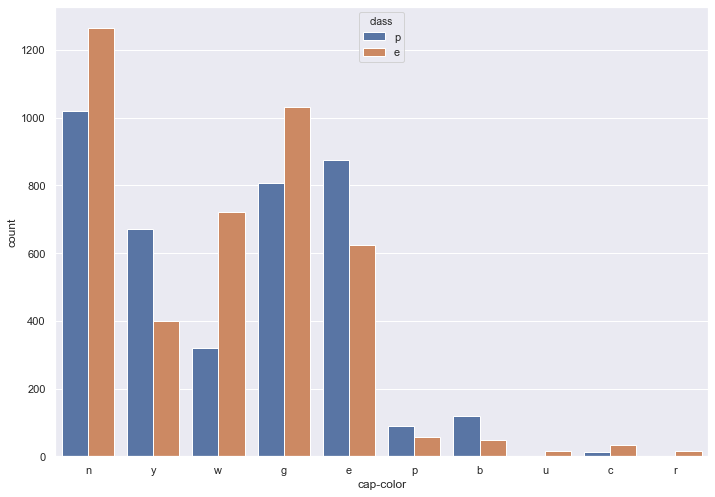

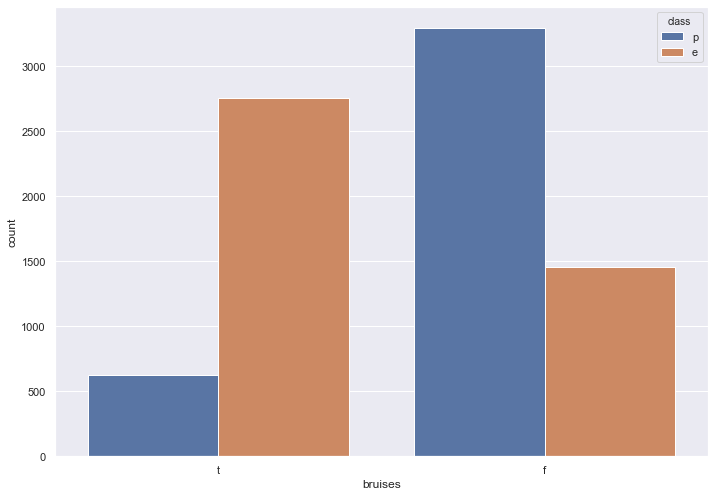

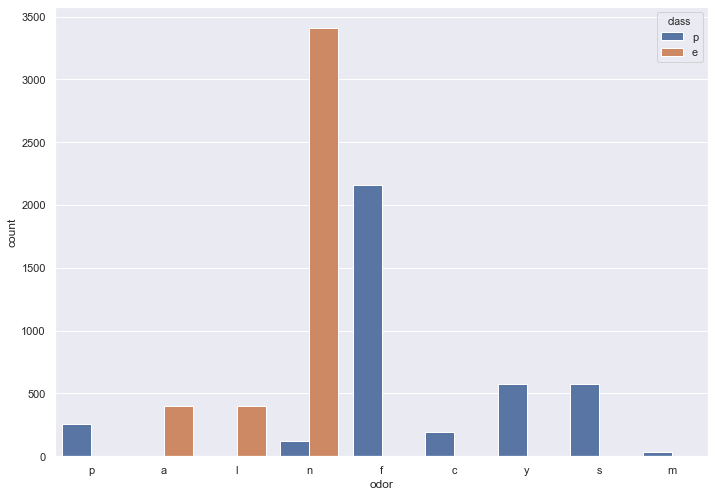

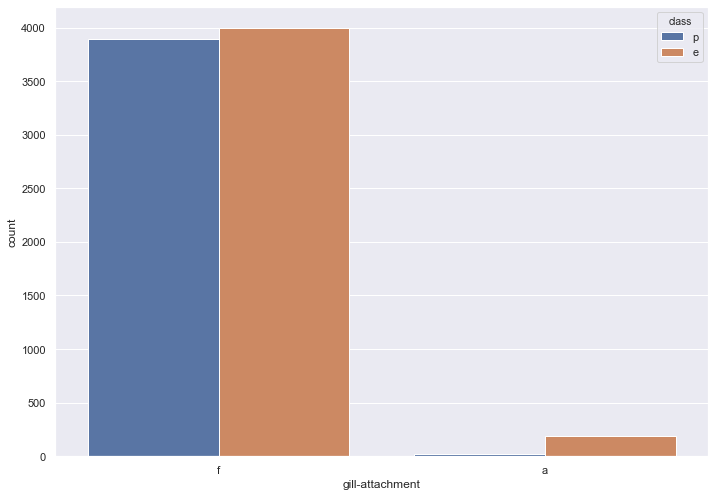

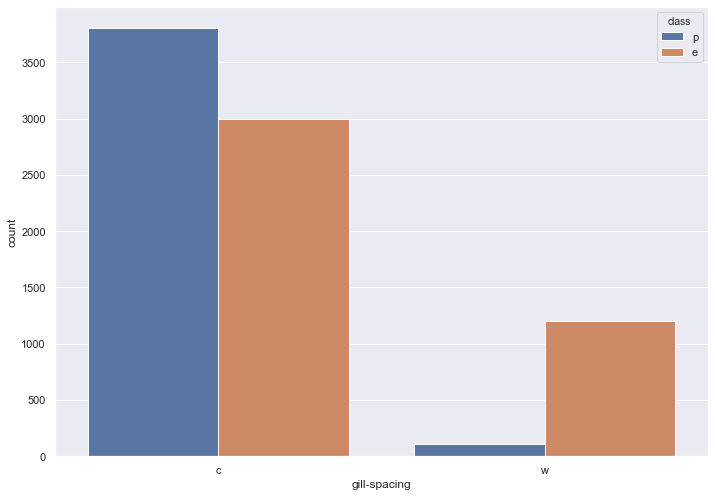

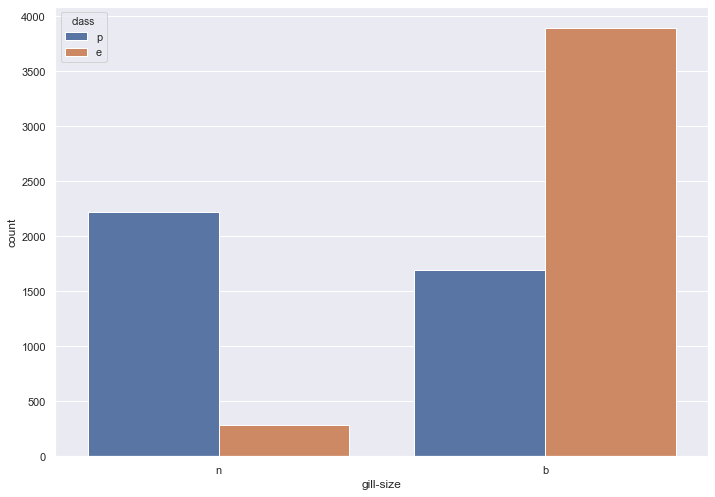

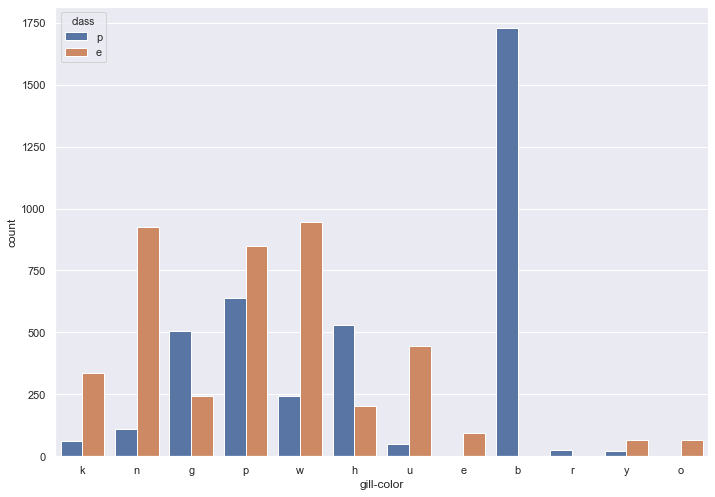

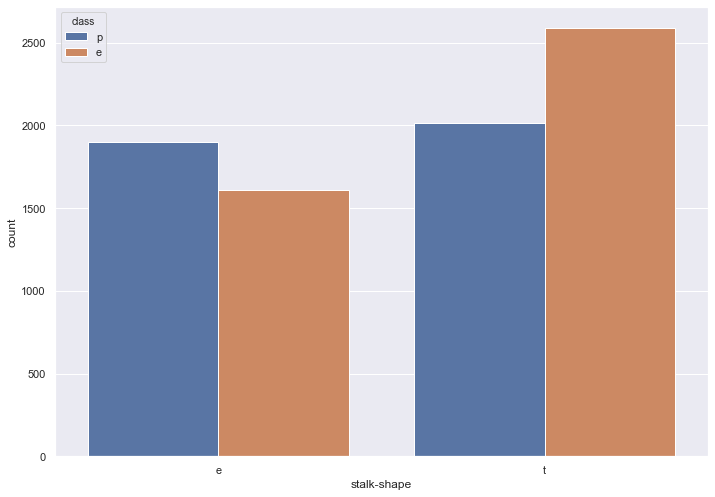

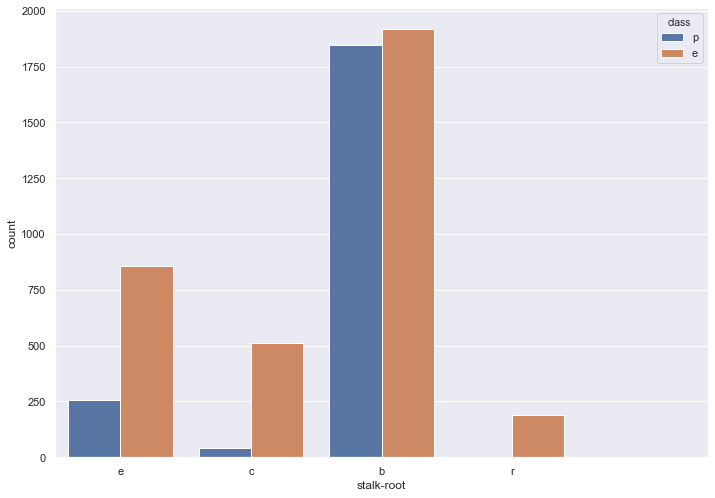

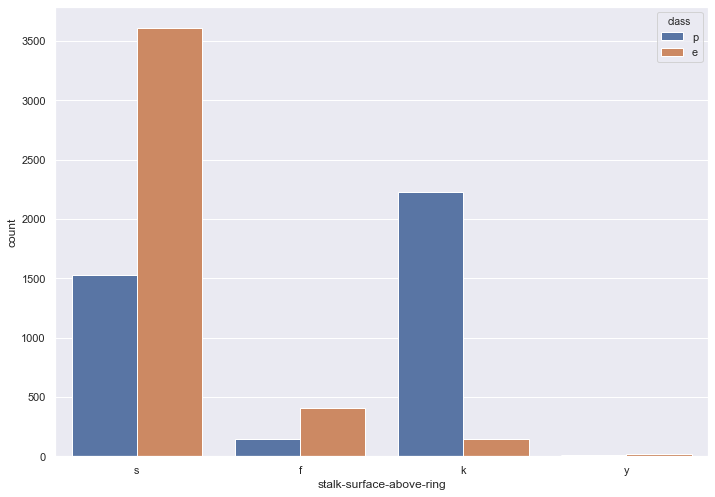

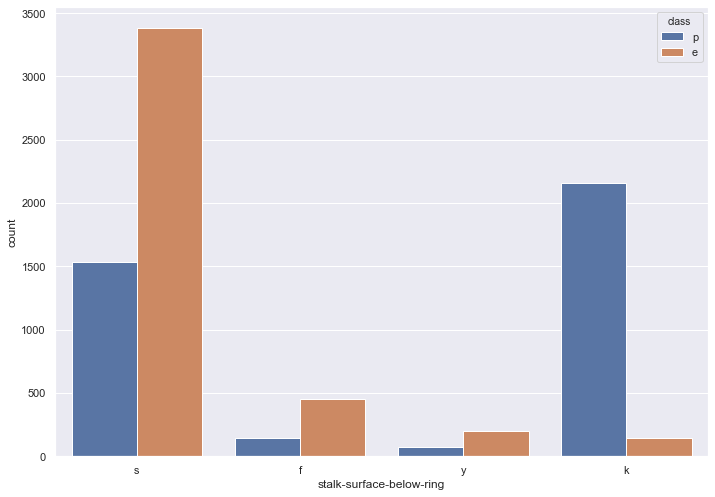

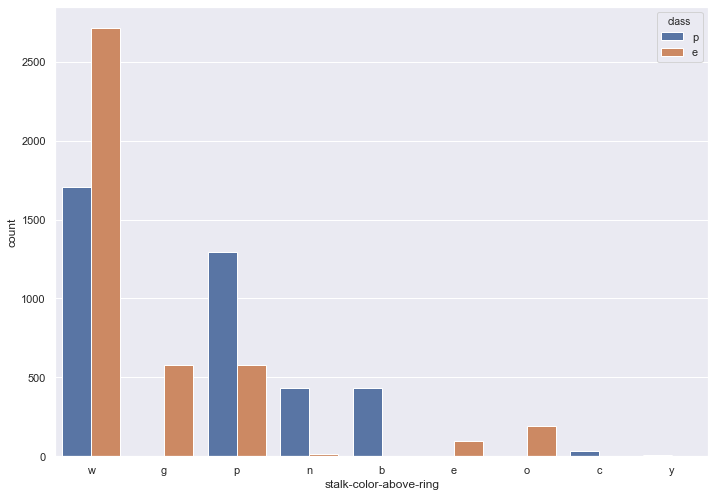

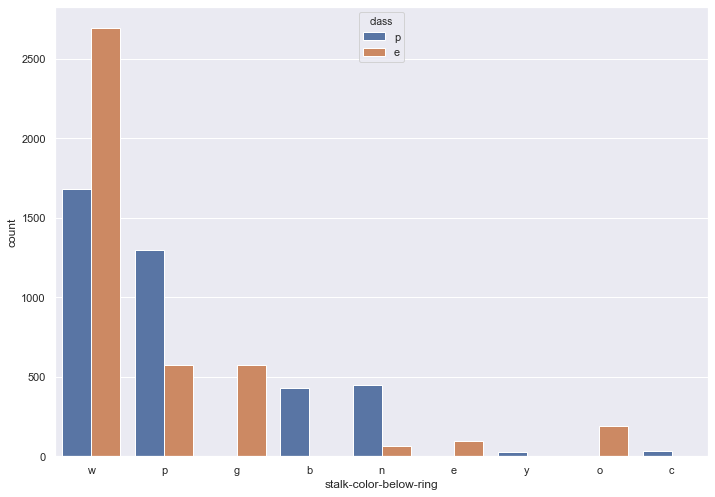

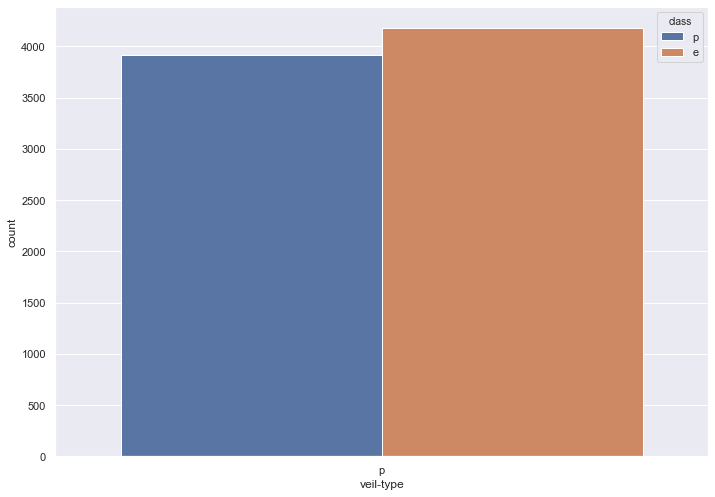

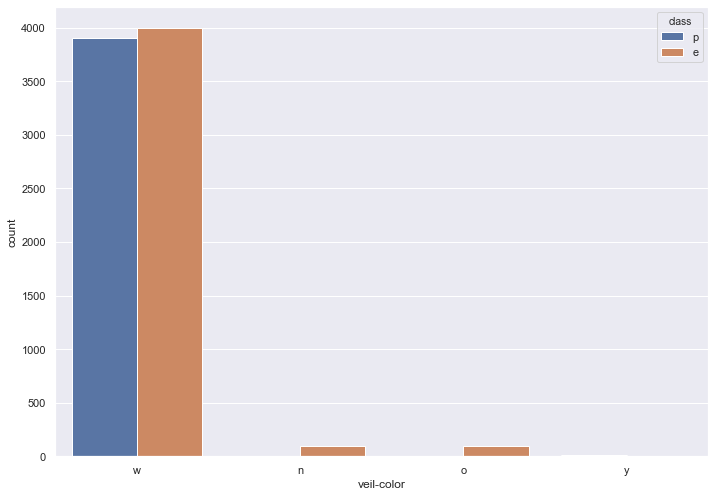

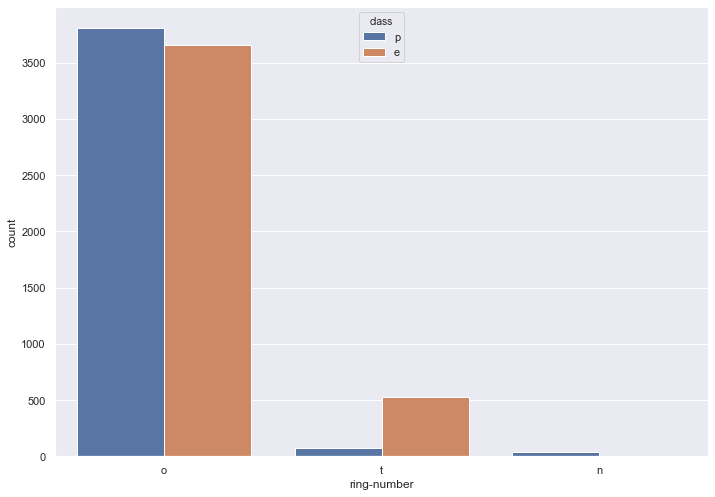

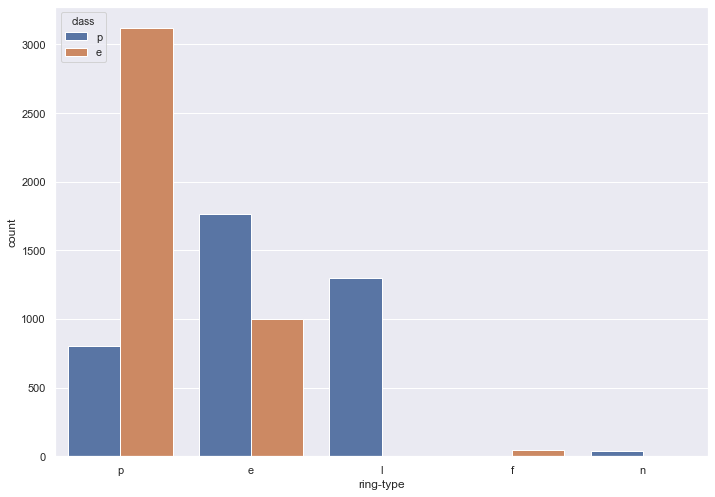

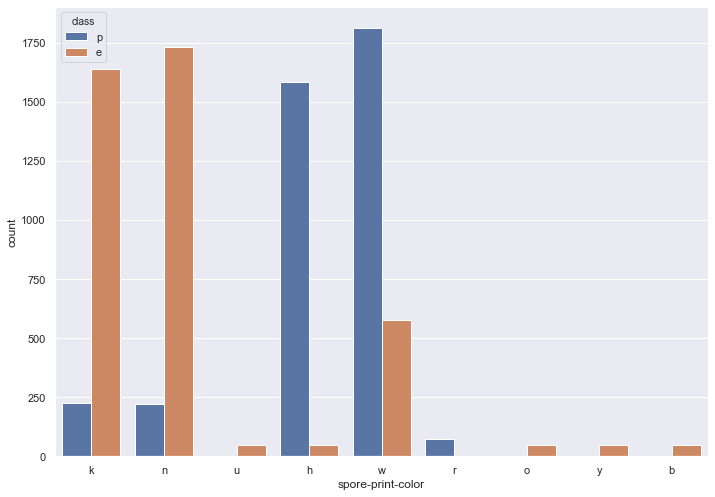

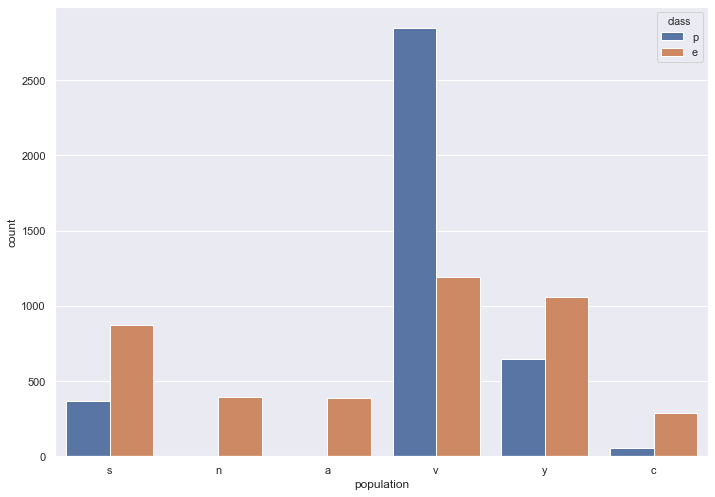

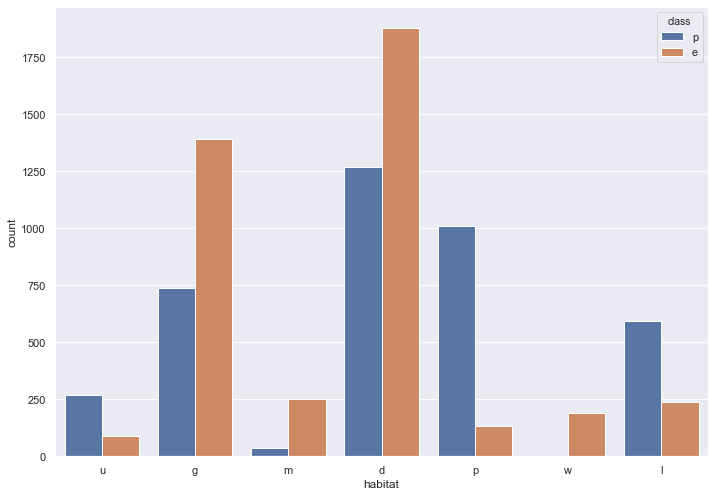

In [10]:
hue=data['class']
data_for_plot=data.drop('class',1)
plot_data(hue,data_for_plot)

In [11]:
data.isnull().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment               24
gill-spacing                  13
gill-size                     44
gill-color                    40
stalk-shape                   17
stalk-root                  2499
stalk-surface-above-ring      38
stalk-surface-below-ring      32
stalk-color-above-ring        43
stalk-color-below-ring        10
veil-type                     31
veil-color                    20
ring-number                   27
ring-type                     48
spore-print-color             22
population                    20
habitat                       36
dtype: int64

dropping Stalk root since it has 2499 missing values and replacing other missing values with mode

In [12]:
data = data.drop("stalk-root", axis=1)

In [13]:
data_mode=data.mode()
#simply using a forloop with object 
for x in data.columns.values:
    data[x]=data[x].fillna(value=data_mode[x].iloc[0])
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

 converting the categorical variables to dummy variables and drooping the first variable to not fall into dummy Variable Trap

In [14]:
data1=pd.get_dummies(data,drop_first=True )
data1.head(5)

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Creating a Train Test Split for Data Modelling

In [21]:
x= data1.iloc[:,[1,2,4,5,6,7,11,16,17,19,21,22]].values
y= data1.iloc[:,0].values

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(x,y,test_size=0.25, random_state=0)

In [22]:
print ('X_train shape is : ', X_train.shape)
print('X_test shape is : ', X_test.shape)
print('Y_train shape is : ', Y_train.shape)
print('Y_test shape is : ', Y_test.shape)

X_train shape is :  (6093, 12)
X_test shape is :  (2031, 12)
Y_train shape is :  (6093,)
Y_test shape is :  (2031,)


# Scaling the dataset using Min Max Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hard Voting

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
log_clf = LogisticRegression()
log_clf.fit(X_train, Y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, Y_train)
svm_clf = SVC(C = 10, probability = True)
svm_clf.fit(X_train, Y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, Y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, Y_pred))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

LogisticRegression 0.6696208764155588
KNeighborsClassifier 0.7262432299359921


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.7355982274741507


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7346134908911867


# Soft Voting

In [122]:
log_clf_soft = LogisticRegression()
log_clf_soft.fit(X_train, Y_train)
knn_clf_soft = KNeighborsClassifier(7)
knn_clf_soft.fit(X_train, Y_train)
svm_clf_soft = SVC(C = 10, probability = True)
svm_clf_soft.fit(X_train, Y_train)

voting_clf_soft = VotingClassifier(estimators=[('lr', log_clf_soft), ('knn', knn_clf_soft), ('svc', svm_clf_soft)], voting='soft')
voting_clf_soft.fit(X_train, Y_train)

print("Accuracy Scores: ")
from sklearn.metrics import accuracy_score
for clf in (log_clf_soft, knn_clf_soft, svm_clf_soft, voting_clf_soft):
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(Y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

Accuracy Scores: 
LogisticRegression 0.6696208764155588


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


KNeighborsClassifier 0.7262432299359921


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.7355982274741507


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7346134908911867


# Bagging with Decision Tree

In [127]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix


bag_clf_1 = BaggingClassifier(DecisionTreeClassifier(random_state=0,max_depth=10),max_samples=100, bootstrap=True, random_state=0)

param_grid = {'n_estimators' : [10,50,100]}


bag_DT_grid= GridSearchCV(bag_clf_1,param_grid,verbose=3)

bag_DT_grid.fit(X_train, Y_train)
y_pred_bag_1 = bag_DT_grid.predict(X_test)




C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.712, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.707, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.684, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.711, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.704, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.701, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .............

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.7s finished


In [129]:
from  sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(Y_test, y_pred_bag_1))

Accuracy Score:  0.7301821762678483


In [135]:
bag_clf_1.fit(X_train, Y_train)
print('Train score: {:.2f}'.format(bag_clf_1.score(X_train, Y_train)))
print('Test score: {:.2f}'.format(bag_clf_1.score(X_test, Y_test)))

Train score: 0.71
Test score: 0.72


In [137]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test, y_pred_tree))

Accuracy Score:  0.7360905957656327


# Bagging with KNN

In [139]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


b_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors = 7),random_state = 0,bootstrap=True,max_samples=100)

param_grid = {'n_estimators' : [10,50,100]}

bag_clf_2 = GridSearchCV(b_clf,param_grid,cv = 5)

bag_clf_2.fit(X_train,Y_train)

y_pred_bag_2 = bag_clf_2.predict(X_test)


print("Best parameters : {}".format(bag_clf_2.best_params_))
print("Best cross validation score : {:.2f}".format(bag_clf_2.best_score_))

Best parameters : {'n_estimators': 10}
Best cross validation score : 0.67


In [141]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred_bag_2))

0.6760216642048252


In [144]:
bag_clf_2.fit(X_train, Y_train)
print('Train score: {:.2f}'.format(bag_clf_2.score(X_train, Y_train)))
print('Test score: {:.2f}'.format(bag_clf_2.score(X_test, Y_test)))

Train score: 0.67
Test score: 0.68


In [149]:
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, Y_train)
y_pred_knn = knn_clf.predict(X_test)

print(accuracy_score(Y_test, y_pred_knn))

0.7262432299359921


# Pasting with Decision Tree Classifier

In [153]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import classification_report,confusion_matrix


bag_clf_1 = BaggingClassifier(DecisionTreeClassifier(random_state=0,max_depth=10),max_samples=100, bootstrap=False, random_state=0)

param_grid = {'n_estimators' : [10,50,100]}


bag_DT_grid= GridSearchCV(bag_clf_1,param_grid,verbose=3)

bag_DT_grid.fit(X_train, Y_train)
y_pred_bag_1 = bag_DT_grid.predict(X_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.708, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.712, total=   0.0s
[CV] n_estimators=10 .................................................
[CV] ..................... n_estimators=10, score=0.708, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.713, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.709, total=   0.1s
[CV] n_estimators=50 .................................................
[CV] ..................... n_estimators=50, score=0.700, total=   0.1s
[CV] n_estimators=100 ................................................
[CV] .............

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.8s finished


In [154]:
from  sklearn.metrics import accuracy_score
print("Accuracy Score: ", accuracy_score(Y_test, y_pred_bag_1))

Accuracy Score:  0.7311669128508124


In [156]:
bag_clf_1.fit(X_train, Y_train)
print('Train score: {:.2f}'.format(bag_clf_1.score(X_train, Y_train)))
print('Test score: {:.2f}'.format(bag_clf_1.score(X_test, Y_test)))

Train score: 0.70
Test score: 0.71


In [157]:
tree_clf = DecisionTreeClassifier(random_state=0)
tree_clf.fit(X_train, Y_train)
y_pred_tree = tree_clf.predict(X_test)

print("Accuracy Score: ", accuracy_score(Y_test, y_pred_tree))

Accuracy Score:  0.7360905957656327


# Pasting with KNN Classifier

In [159]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


b_clf = BaggingClassifier(KNeighborsClassifier(n_neighbors = 7),random_state = 0,bootstrap=False,max_samples=100)

param_grid = {'n_estimators' : [10,50,100]}

bag_clf_2 = GridSearchCV(b_clf,param_grid,cv = 5)

bag_clf_2.fit(X_train,Y_train)

y_pred_bag_2 = bag_clf_2.predict(X_test)


print("Best parameters : {}".format(bag_clf_2.best_params_))
print("Best cross validation score : {:.2f}".format(bag_clf_2.best_score_))

Best parameters : {'n_estimators': 10}
Best cross validation score : 0.67


In [160]:
from  sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, y_pred_bag_2))

0.6533727227966519


In [162]:
bag_clf_2.fit(X_train, Y_train)
print('Train score: {:.2f}'.format(bag_clf_2.score(X_train, Y_train)))
print('Test score: {:.2f}'.format(bag_clf_2.score(X_test, Y_test)))

Train score: 0.65
Test score: 0.65


In [165]:
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, Y_train)
y_pred_knn = knn_clf.predict(X_test)

print(accuracy_score(Y_test, y_pred_knn))

0.7262432299359921


# Ada Boosting

In [73]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
ada = AdaBoostClassifier()
param_grid = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1], 
              'n_estimators': [50,100,150,200,250,300]}

grid_search = GridSearchCV(ada, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'learning_rate': 0.05, 'n_estimators': 150}
Best score 0.67


In [74]:
ada = AdaBoostClassifier(learning_rate= 0.001,n_estimators = 50,random_state = 10)
ada.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.53
Accuracy of GBDT classifier on test set: 0.53



# 1. Logistic Regression

In [75]:
ada_clf = AdaBoostClassifier(LogisticRegression(C=1),learning_rate= 0.001,n_estimators = 50,random_state = 10)
ada_clf.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_clf.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_clf.score(X_test_scaled, Y_test)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

Accuracy of GBDT classifier on training set: 0.59
Accuracy of GBDT classifier on test set: 0.60



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

# 2. Decision Tree

In [76]:
ada_DTC = AdaBoostClassifier(DecisionTreeClassifier(max_depth=6),learning_rate= 0.001,n_estimators = 50,random_state = 10,algorithm='SAMME')
ada_DTC.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_DTC.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_DTC.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.69
Accuracy of GBDT classifier on test set: 0.70



# 3. Random Forest

In [77]:
ada_RFC = AdaBoostClassifier(RandomForestClassifier(max_depth=10,n_estimators=100),learning_rate= 0.001,n_estimators = 50,random_state = 10,algorithm='SAMME')
ada_RFC.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(ada_RFC.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(ada_RFC.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.72
Accuracy of GBDT classifier on test set: 0.74



# Gradient Boosting Classifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(random_state = 10)
param_grid = {'learning_rate':[0.001, 0.005, 0.01, 0.05, 0.1], 
              'max_depth': range(1,11)}

grid_search = GridSearchCV(boost, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_scaled, Y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'learning_rate': 0.005, 'max_depth': 10}
Best score 0.72


In [79]:
boost = GradientBoostingClassifier(learning_rate= 0.01,max_depth= 1,random_state = 10)
boost.fit(X_train_scaled, Y_train)

print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(boost.score(X_train_scaled, Y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(boost.score(X_test_scaled, Y_test)))

Accuracy of GBDT classifier on training set: 0.60
Accuracy of GBDT classifier on test set: 0.61



# Data Reduction using PCA

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
print(pca.n_components_)


7


# 1 Logistic Regression

In [81]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)
print(pca.n_components_)


7


In [82]:
clf_PCA = LogisticRegression(C=1).fit(X_train_PCA,Y_train)
print('Accuracy of Logistic Regression Classifier on training set: {:.2f}'.format(clf_PCA.score(X_train_PCA,Y_train)))
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(clf_PCA.score(X_test_PCA,Y_test)))

Accuracy of Logistic Regression Classifier on training set: 0.66
Accuracy of Logistic Regression Classifier on test set: 0.66


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# 2 KNN

In [85]:
from sklearn.neighbors import KNeighborsClassifier

knn_PCA = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20, 25, 30]}

grid_search = GridSearchCV(knn_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'n_neighbors': 20}
Best score 0.71


In [86]:
knn_PCA = KNeighborsClassifier(n_neighbors = 5)
knn_PCA.fit(X_train_PCA, Y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PCA.score(X_train_PCA, Y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PCA.score(X_test_PCA, Y_test)))

Accuracy of K-NN classifier on training set: 0.70
Accuracy of K-NN classifier on test set: 0.69


# 3. SVC Linear

In [87]:
from sklearn.svm import SVC
svclinear_PCA = SVC(kernel = 'linear')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svclinear_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 10, 'gamma': 0.001}
Best score 0.65


In [89]:
svclinear_PCA = SVC(kernel = 'linear',C=0.5,gamma=0.001)
svclinear_PCA.fit(X_train_PCA, Y_train)

print(svclinear_PCA.score(X_train_PCA, Y_train))
print(svclinear_PCA.score(X_test_PCA, Y_test))

0.6374528147053996
0.6361398325947809


# 4. SVC Kernal

In [88]:
from sklearn.svm import SVC
svckernal_PCA = SVC(kernel = 'rbf')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svckernal_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 50, 'gamma': 100}
Best score 0.72


In [90]:
svckernal_PCA = SVC(kernel = 'rbf',C=5,gamma=0.05)
svckernal_PCA.fit(X_train_PCA, Y_train)

print(svckernal_PCA.score(X_train_PCA, Y_train))
print(svckernal_PCA.score(X_test_PCA, Y_test))

0.6838995568685377
0.6967011324470704


# 5. SVC Poly

In [91]:
from sklearn.svm import SVC
svckernal_PCA = SVC(kernel = 'poly')
param_grid = {'C':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100], 
              'gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

grid_search = GridSearchCV(svckernal_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'C': 0.05, 'gamma': 100}
Best score 0.72


In [92]:
svckernal_PCA = SVC(kernel = 'poly',C=5,gamma=0.05)
svckernal_PCA.fit(X_train_PCA, Y_train)

print(svckernal_PCA.score(X_train_PCA, Y_train))
print(svckernal_PCA.score(X_test_PCA, Y_test))


0.5164943377646479
0.5224027572624323


# 6. Decision Tree

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

DTC_PCA = DecisionTreeClassifier()

param_grid = {'max_depth': range(1,11)}

grid_search = GridSearchCV(DTC_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 10}
Best score 0.72


In [94]:
DTC_PCA = DecisionTreeClassifier(max_depth=2)
DTC_PCA.fit(X_train_PCA,Y_train)

print(DTC_PCA.score(X_train_PCA, Y_train))
print(DTC_PCA.score(X_test_PCA, Y_test))

0.6335138683735434
0.6282619399310685


# 7 Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

RFC_PCA= RandomForestClassifier()

param_grid = {'max_depth': range(1,11),'n_estimators' : [10,50,100,150,200]}

grid_search = GridSearchCV(RFC_PCA, param_grid, cv = 2,scoring='recall_weighted')
grid_search.fit(X_train_PCA, Y_train) 
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.2f}'.format(grid_search.best_score_))

Best parameters{'max_depth': 10, 'n_estimators': 10}
Best score 0.72


In [97]:
RFC_PCA = RandomForestClassifier(max_depth=10,n_estimators= 50)
RFC_PCA.fit(X_train_PCA,Y_train)

print(RFC_PCA.score(X_train_PCA, Y_train))
print(RFC_PCA.score(X_test_PCA, Y_test))

0.7218119153126539
0.7360905957656327


# Deep Learning

In [103]:
!pip install tensorflow

In [104]:
!pip install --upgrade Keras

Requirement already up-to-date: Keras in c:\programdata\anaconda3\lib\site-packages (2.3.1)


In [105]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [108]:
#step 1: build the model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 12, activation = 'sigmoid'))
#hidden layers
model.add(Dense(5, activation = 'relu'))
#output layer
model.add(Dense(1, activation = 'sigmoid'))

#step 2: build the computational graph - compile
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#step 3: train the model
model.fit(X_train, Y_train, epochs = 100, batch_size= 20)

#step 4: evaluate

Train on 6093 samples
Epoch 1/100
6093/6093 [==============================] - 2s 310us/sample - loss: 0.6894 - accuracy: 0.5429
Epoch 2/100
6093/6093 [==============================] - 1s 131us/sample - loss: 0.6778 - accuracy: 0.6036
Epoch 3/100
6093/6093 [==============================] - 1s 125us/sample - loss: 0.6652 - accuracy: 0.6465
Epoch 4/100
6093/6093 [==============================] - 1s 143us/sample - loss: 0.6509 - accuracy: 0.6465
Epoch 5/100
6093/6093 [==============================] - 1s 148us/sample - loss: 0.6372 - accuracy: 0.6524
Epoch 6/100
6093/6093 [==============================] - 1s 126us/sample - loss: 0.6266 - accuracy: 0.6660 - loss: 0
Epoch 7/100
6093/6093 [==============================] - 1s 141us/sample - loss: 0.6190 - accuracy: 0.6650
Epoch 8/100
6093/6093 [==============================] - 1s 148us/sample - loss: 0.6134 - accuracy: 0.6621
Epoch 9/100
6093/6093 [==============================] - 1s 139us/sample - loss: 0.6096 - accuracy: 0.6650
Epoch

In [113]:
from sklearn.metrics import precision_score, recall_score

y_train_pred = model.predict(X_train)

In [114]:
y_train_pred

array([[8.2207012e-01],
       [9.6619129e-05],
       [3.7295383e-01],
       ...,
       [2.8816423e-01],
       [3.2737622e-01],
       [4.1242453e-01]], dtype=float32)

In [115]:
y_pred = np.where(y_train_pred>= 0.75, 1, 0)

In [118]:
print('Precision: ', precision_score(Y_train, y_pred))
print('Recall: ', recall_score(Y_train, y_pred))

Precision:  0.8184165232358004
Recall:  0.3228105906313646


# Conclusion

Random Forest gives the best Modelling Score.
Bagging with Decision Tree provides better Accuracy than KNN.
Pasting With Decision Tree provides better Accuracy than KNN.
PCA shows improvment in just KNN
The table below shows the values for all the Models and its comparison to PCA: